In [1]:
import ee
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ee.Initialize()

In [3]:
North_China_Plain_Boundary = ee.FeatureCollection("users/wangjinzhulala/North_China_Plain_Python/Boundary_shp/North_China_Plain_Boundary")

### Fig_3_1_A heat map of Landsat data

In [6]:
# get the Landsat TOA data
Landsat_5 = ee.ImageCollection("LANDSAT/LT05/C01/T1_TOA").filterDate('1990-01-01','2010-12-31').filterBounds(North_China_Plain_Boundary)
Landsat_7 = ee.ImageCollection("LANDSAT/LE07/C01/T1_TOA").filterDate('2011-01-01','2013-12-31').filterBounds(North_China_Plain_Boundary)
Landsat_8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_TOA").filterDate('2014-01-01','2019-12-31').filterBounds(North_China_Plain_Boundary)

In [4]:
# get the Sentinel MSI 1C data
Sentinel = ee.ImageCollection("COPERNICUS/S2").filterDate('2015-01-01','2019-12-31').filterBounds(North_China_Plain_Boundary)

In [57]:
# # Calculate how many Landsat images are included

# ID = []
# ID_s = []

# for year in range(2015,2020):   
        
#     year_start = f'{year}-01-01'
#     year_end   = f'{year}-12-31'
    
#     # get the each_year landsat data
#     if   year <= 2010:            
#         year_Landsat = Landsat_5.filterDate(year_start,year_end)

#     elif year <= 2013:
#         year_Landsat = Landsat_7.filterDate(year_start,year_end)

#     elif year <= 2019:
#         year_Landsat = Landsat_8.filterDate(year_start,year_end)
        

    
    
#     # get the "id" for Landsat
#     Info_fe_col = year_Landsat.map(lambda x : ee.Feature(ee.Geometry.Point(0,0),{'id':x.id()}))
#     Info_list   = Info_fe_col.getInfo()['features']
#     Info        = [d['id'] for d in Info_list]

#     add the info into ID
#     ID.extend(Info)

#     # print out the process
#     print(f'Retrive info of year {year} complete!')

In [27]:
# Calculate how many Sentinel images are included

ID_s = []

for year in range(2015,2020):
    for month in range(1,13):
        
        year_start = f'{year}-{month}-01'
        year_end   = ee.Date(year_start).advance(1,'month')

        
        # get the each_year Sentinel data
        year_Sentinel = Sentinel.filterDate(year_start,year_end)

        # get the "id" for Sentinel
        Info_fe_col_s = year_Sentinel.map(lambda x : ee.Feature(ee.Geometry.Point(0,0),{'id':x.id()}))
        Info_list_s   = Info_fe_col_s.getInfo()['features']
        Info_s        = [d['id'] for d in Info_list_s]


        # add the infor into ID_s
        ID_s.extend(Info_s)

        # print out the process
        print(f'Retrive info of year {year}-{month} complete!')

Retrive info of year 2015-1 complete!
Retrive info of year 2015-2 complete!
Retrive info of year 2015-3 complete!
Retrive info of year 2015-4 complete!
Retrive info of year 2015-5 complete!
Retrive info of year 2015-6 complete!
Retrive info of year 2015-7 complete!
Retrive info of year 2015-8 complete!
Retrive info of year 2015-9 complete!
Retrive info of year 2015-10 complete!
Retrive info of year 2015-11 complete!
Retrive info of year 2015-12 complete!
Retrive info of year 2016-1 complete!
Retrive info of year 2016-2 complete!
Retrive info of year 2016-3 complete!
Retrive info of year 2016-4 complete!
Retrive info of year 2016-5 complete!
Retrive info of year 2016-6 complete!
Retrive info of year 2016-7 complete!
Retrive info of year 2016-8 complete!
Retrive info of year 2016-9 complete!
Retrive info of year 2016-10 complete!
Retrive info of year 2016-11 complete!
Retrive info of year 2016-12 complete!
Retrive info of year 2017-1 complete!
Retrive info of year 2017-2 complete!
Retriv

In [4]:
# # get the Year_Month_Day 
# Year  = [s[:4]  for s in ID_s]
# Month = [s[4:6] for s in ID_s]
# Day   = [s[6:8] for s in ID_s]

# # create a df from Sensor, Path, Date
# ID_s_df = pd.DataFrame([Year,Month,Day]).T
# ID_s_df.columns = ['Year','Month','Day']

# # save the df to csv
# ID_s_df.to_csv('./Result/Sentinel_distribution.csv',index =False)

# load the df 
ID_s_df = pd.read_csv('./Result/Sentinel_distribution.csv')

In [6]:
# # get the Sensor,Path,Date information
# Sensor = [s.split('_')[0] for s in ID]
# Path   = [s.split('_')[1] for s in ID]
# Date   = [s.split('_')[2] for s in ID]

# # create a df from Sensor, Path, Date
# ID_df = pd.DataFrame([Sensor,Path,Date]).T
# ID_df.columns = ['Sensor','Path','Date']

# # create Year and Month column
# ID_df['Year'] = ID_df['Date'].apply(lambda x:x[:4])
# ID_df['Month'] = ID_df['Date'].apply(lambda x:x[4:6])

# # save the df to csv
# ID_df.to_csv('./Result/Landsat_distribution.csv',index =False)

# load the df 
ID_df = pd.read_csv('./Result/Landsat_distribution.csv')

### Make the Heatmap

In [7]:
Sentinel_distribution = ID_s_df[['Year','Month']]
Sentinel_distribution['One'] = 1

Sentinel_month_sum = Sentinel_distribution.groupby(['Year','Month']).sum().unstack(0)
Sentinel_month_sum.columns = range(2015,2020)

Sentinel_month_sum.sort_index(ascending=False,inplace=True)

In [8]:
Landsat_distribution = ID_df[['Year','Month']]
Landsat_distribution['One'] = 1

Landsat_month_sum = Landsat_distribution.groupby(['Year','Month']).sum().unstack(0)
Landsat_month_sum.columns = range(1990,2020)

Landsat_month_sum.sort_index(ascending=False,inplace=True)

C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


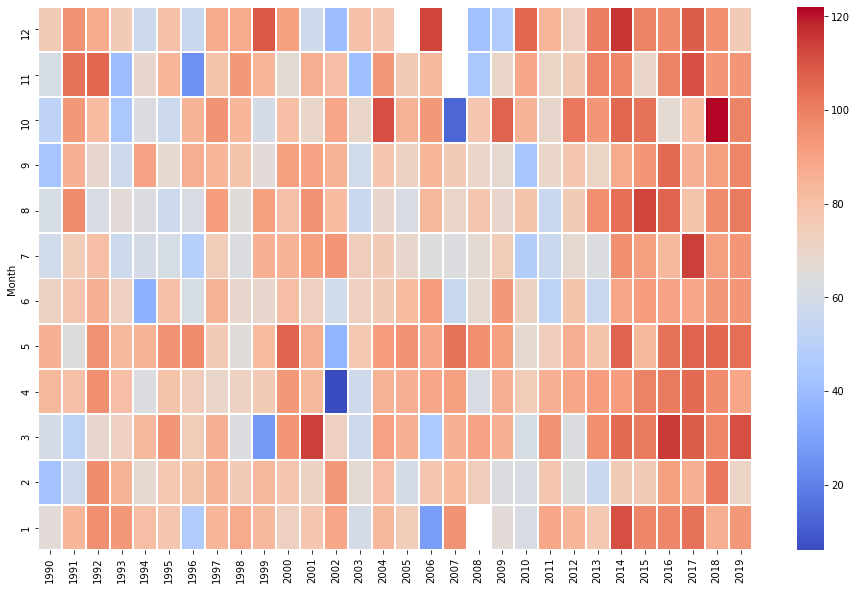

In [9]:
plt.figure(figsize=(16,10))
sns.heatmap(Landsat_month_sum,linecolor='white',linewidths=1,cmap='coolwarm')

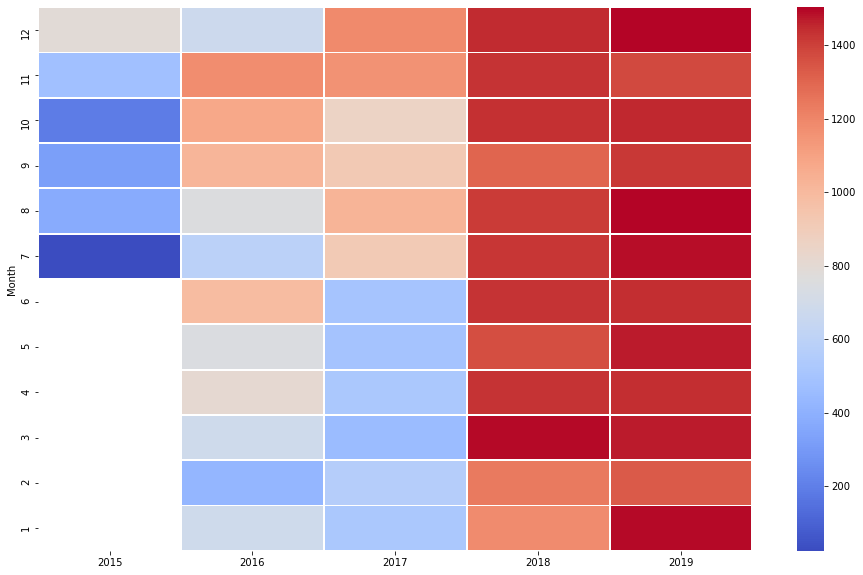

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(Sentinel_month_sum,linecolor='white',linewidths=1,cmap='coolwarm')

### Fig_3_2_The landsat overlay map

In [56]:
# get the mask img, which indicate the footprint the landsat img, where 1 
# mean valid pixel and 0 indicate invalid pixel

Landsat_5_sum = Landsat_5.map(lambda img: img.mask().reduce('min')).sum()
Landsat_7_sum = Landsat_7.map(lambda img: img.mask().reduce('min')).sum()
Landsat_8_sum = Landsat_8.map(lambda img: img.mask().reduce('min')).sum()

Sentinel_sum = Sentinel.map(lambda img: img.mask().reduce('min')).sum()


# define a geometry for export
landsat_8_raw = ee.ImageCollection("LANDSAT/LC08/C01/T1")\
                  .filterDate('2019-01-01','2019-12-31')\
                  .filterBounds(North_China_Plain_Boundary)

export_region = landsat_8_raw.geometry().bounds()

### Export the footprint map

In [55]:
# export to Google Storage
task = ee.batch.Export.image.toCloudStorage(image          = Sentinel_sum.toUint16(),
                                            description    = 'Sentinel_sum',
                                            bucket         = 'north_china_plain',
                                            fileNamePrefix = 'Sentinel_sum',
                                            region         = export_region,
                                            scale          = 10,
                                            maxPixels      = int(1e13),
                                            skipEmptyTiles = True)
task.start()

print(f'Exporting Sentinel_sum successful!')


Exporting Sentinel_sum successful!


In [119]:
for img,name in zip([Landsat_5_sum,Landsat_7_sum,Landsat_8_sum],
                  ['Landsat_5_sum','Landsat_7_sum','Landsat_8_sum']):
    
    # export to Google Storage
    task = ee.batch.Export.image.toCloudStorage(image          = img.toUint16(),
                                                description    = name,
                                                bucket         = 'north_china_plain',
                                                fileNamePrefix = name,
                                                region         = export_region,
                                                scale          = 30,
                                                maxPixels      = int(1e13),
                                                skipEmptyTiles = True)
    task.start()
    
    print(f'Exporting {name} successful!')
    

Exporting Landsat_5_sum successful!
Exporting Landsat_7_sum successful!
Exporting Landsat_8_sum successful!
